<a href="https://colab.research.google.com/github/toshi47/SOM/blob/main/minisom_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install minisom
from minisom import MiniSom
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=ceb8e4e0f464c5742c2f8684d9d945c7696f1664d7db1e9984f760e26bcc28d0
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(type(train_X[0]))
train_X=train_X[:5000]
num=train_y[:5000]
train_X=np.reshape(train_X,(5000,784))
print(train_X.shape)

11501568/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'>
(5000, 784)


In [ ]:
# Initializing neurons and Training
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import scale
data=train_X
data = scale(data)
n_neurons = 50
m_neurons = 50


NameError: ignored

In [ ]:
som = MiniSom(n_neurons, m_neurons, data.shape[1], sigma=4,
              learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(data)
som.train(data, 5000, random_order=True, verbose=True)  # random training

/usr/local/lib/python3.7/dist-packages/minisom.py:379: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 12.73592623342981


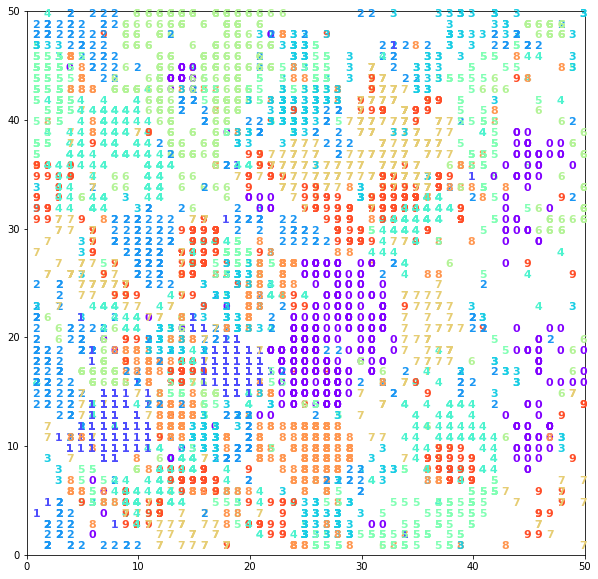

In [ ]:
plt.figure(figsize=(10, 10))
wmap = {}
im = 0
for x, t in zip(data, num):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
#plt.savefig('resulting_images/som_digts.png')
plt.show()

In [ ]:
from sklearn import datasets
# load the digits dataset from scikit-learn
digits = datasets.load_digits(n_class=10)
data = digits.data  # matrix where each row is a vector that represent a digit.
data = scale(data)
print(data.shape)
num = digits.target  # num[i] is the digit represented by data[i]
print(data[0])
som = MiniSom(30, 30, 64, sigma=4,
              learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(data)
som.train(data, 5000, random_order=True, verbose=True)  # random training

(1797, 64)
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.75743581 -0.20978513 -0.02359646 -0.29908135  0.08671869  0.20829258
 -0.36677122 -1.14664746 -0.5056698  -0.19600752]
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 3.0118182959904423


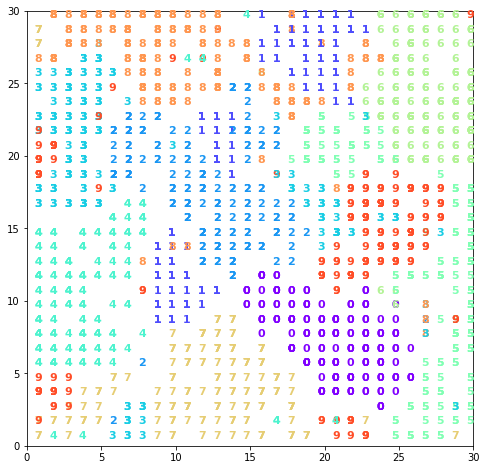

In [ ]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, num):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

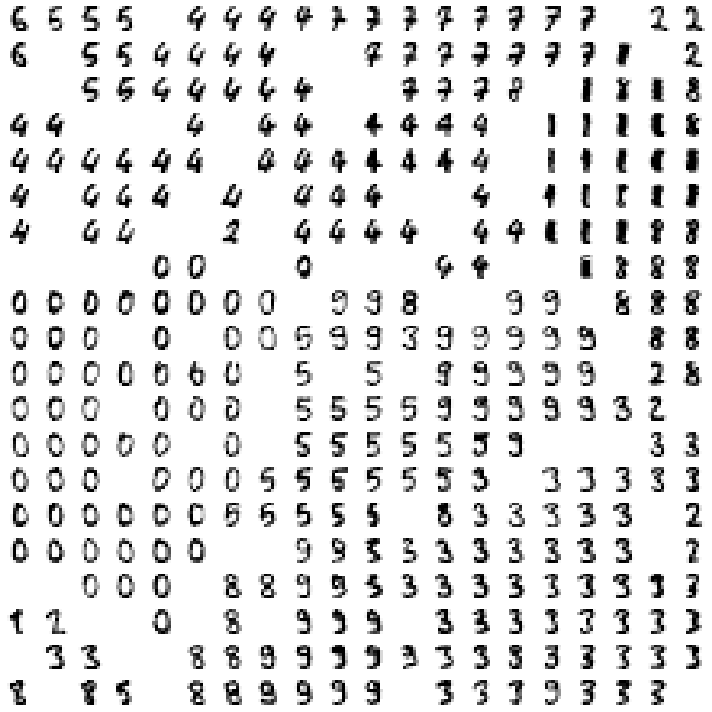

In [ ]:
plt.figure(figsize=(10, 10), facecolor='white')
cnt = 0
for j in reversed(range(20)):  # images mosaic
    for i in range(20):
        plt.subplot(20, 20, cnt+1, frameon=False,  xticks=[],  yticks=[])
        if (i, j) in wmap:
            plt.imshow(digits.images[wmap[(i, j)]],
                       cmap='Greys', interpolation='nearest')
        else:
            plt.imshow(np.zeros((8, 8)),  cmap='Greys')
        cnt = cnt + 1

plt.tight_layout()
plt.show()

In [2]:
from sklearn.datasets import fetch_lfw_people
from matplotlib import pyplot as plt
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
print(lfw_people.data[0])

[254.       254.       251.66667  ...  87.333336  88.666664  86.666664]


[254.       254.       251.66667  ...  87.333336  88.666664  86.666664]
(1288, 50, 37)


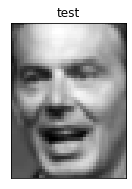

In [35]:
import numpy as np
print(lfw_people.data[0])
def plot_gallery(images, titles, h, w, n_row=1, n_col=1):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        im=np.reshape(images[1],(h, w))
        plt.imshow(im, cmap=plt.cm.gray)
        plt.title(titles[0], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set
print(lfw_people.images.shape)
prediction_titles=["test"]
plot_gallery(lfw_people.data, prediction_titles, 50,37)


In [72]:
print(np.unique(lfw_people.target))
print(lfw_people.target_names)

[0 1 2 3 4 5 6]
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


In [73]:
!pip install minisom
from minisom import MiniSom
n_neurons=15
m_neurons=15
data=lfw_people.data
som = MiniSom(n_neurons, m_neurons, data.shape[1], sigma=4,
              learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(data)
som.train(data, 2000, random_order=True, verbose=True)  # random training

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/minisom.py:379: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


 [ 2000 / 2000 ] 100% - 0:00:00 left 
 quantization error: 1119.4832398954163


In [80]:
wmap = {}
wx={}
im = 0
for x, t in zip(data, lfw_people.target):  # scatterplot
    w = som.winner(x)
    wx[w].append(im)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()


KeyError: ignored

In [53]:
print(wmap)
print(w)
print(wmap[w])
print(wx[0])

{(2, 6): 1030, (4, 7): 1117, (2, 3): 936, (2, 7): 1182, (5, 1): 1237, (1, 0): 1283, (9, 8): 1118, (5, 5): 1262, (3, 9): 1201, (3, 8): 1224, (9, 7): 1220, (4, 8): 1279, (0, 6): 1286, (4, 6): 1116, (1, 7): 1272, (9, 4): 1280, (9, 5): 1245, (8, 1): 1152, (2, 8): 1218, (1, 5): 1252, (3, 0): 1281, (6, 1): 1213, (9, 0): 1255, (2, 0): 1266, (3, 7): 1167, (8, 3): 1111, (7, 4): 1244, (5, 6): 1079, (3, 4): 1257, (7, 6): 1115, (1, 6): 1263, (3, 5): 1271, (0, 0): 1194, (4, 9): 1212, (7, 5): 1222, (6, 3): 1232, (0, 3): 1243, (9, 2): 1145, (4, 2): 1073, (0, 2): 1258, (8, 6): 1264, (8, 5): 1278, (6, 5): 1112, (0, 4): 1039, (3, 2): 1282, (6, 4): 1251, (2, 1): 1153, (2, 2): 1160, (3, 6): 1242, (4, 1): 947, (0, 9): 1199, (7, 0): 1135, (6, 6): 1268, (1, 8): 1261, (0, 5): 1126, (6, 9): 1235, (6, 7): 1192, (2, 9): 909, (5, 4): 819, (2, 5): 1071, (7, 9): 1226, (0, 7): 1267, (4, 0): 1284, (8, 8): 1285, (7, 1): 1240, (1, 9): 1247, (5, 3): 1269, (4, 5): 1273, (0, 8): 1215, (1, 4): 973, (8, 0): 1265, (9, 6): 11

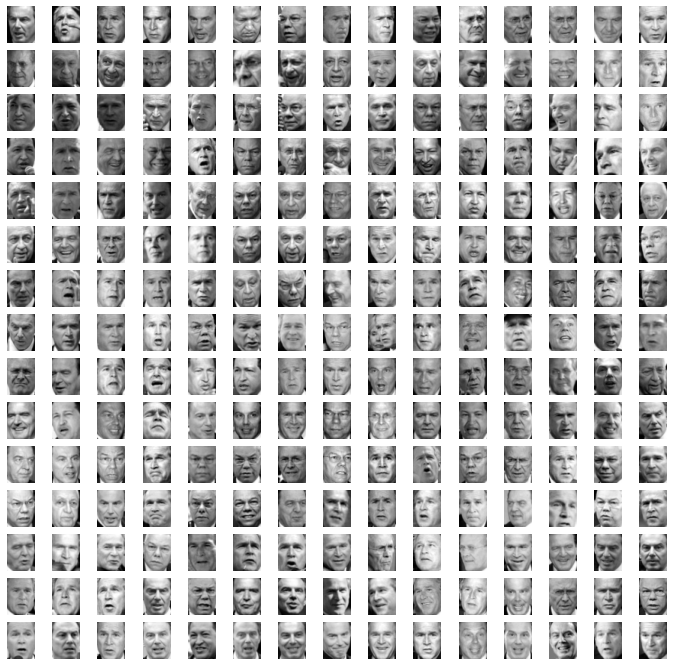

In [66]:
n_row=15
n_col=15
_, axs = plt.subplots(n_row, n_col, figsize=(12, 12))
#axs = axs.flatten()
for i in range(n_row):
  for j in range(n_col):
    axs[i,j].axis("off")
    if (i,j) in wmap:
      img=data[wmap[(i,j)]]
      axs[i,j].imshow(img.reshape((50,37)),cmap=plt.cm.gray)
    else:
      plt.imshow(np.zeros((50, 37)),  cmap=plt.cm.gray)
plt.show()

In [78]:
print(wx[(0,0)])


(array([135.33333 , 124.666664, 136.33333 , ...,  46.666668,  37.666668,
        40.333332], dtype=float32), 3)
